In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import v2
import digits

In [2]:
seed = 8128
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

In [ ]:
dataset1_transform = v2.Compose([
    v2.Grayscale(num_output_channels=1),
    v2.Resize((28, 28)),
    v2.RandomAffine(degrees=0, scale=(0.5, 1.0), translate=(0.1, 0.1), fill=255),
    v2.ColorJitter(brightness=0.5, contrast=0.2),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.GaussianNoise(mean=0.0, sigma=0.1),
    v2.Normalize((0.5,), (0.5,))
])

dataset2_transform = v2.Compose([
    v2.Grayscale(num_output_channels=1),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.5,), (0.5,))
])

# Chars74K-Digital-English-Font, sample002 to sample010(digit 1 to 9)
dataset1 = datasets.ImageFolder(root='./data/dataset1', transform=dataset1_transform)
# Cropped from sudoku images, 230 samples for each digits
dataset2 = datasets.ImageFolder(root='./data/dataset2', transform=dataset2_transform)
# Split dataset2 to train(transfer learning) and validate
dataset2_1, dataset2_2 = random_split(dataset2, [0.7, 0.3])

train1_loader = DataLoader(dataset1, batch_size=64, shuffle=True, pin_memory=True)
train2_loader = DataLoader(dataset2_1, batch_size=64, shuffle=True, pin_memory=True)
val_loader = DataLoader(dataset2_2, batch_size=64, shuffle=False, pin_memory=True)

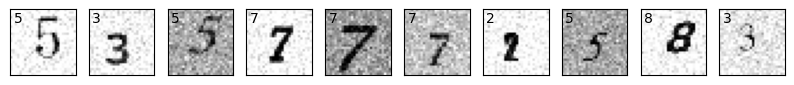

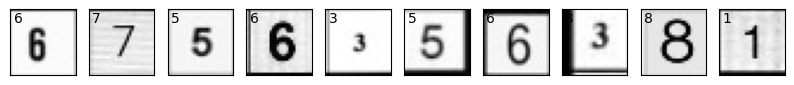

In [4]:
digits.show_random_samples(dataset1)
digits.show_random_samples(dataset2)

In [5]:
model = digits.SudokuDigitCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Training: 100%|██████████| 20/20 [04:20<00:00, 13.02s/it]


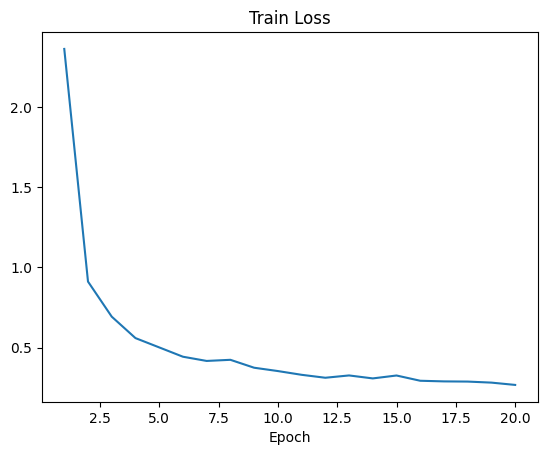

Validate: 100%|██████████| 10/10 [00:00<00:00, 14.25it/s]

Accuracy: 81.32%


In [ ]:
# First train the network to recognize digits
train_loss = digits.train(train1_loader, model, loss_fn, optimizer, 20)
digits.plot_train_loss(train_loss)
accuracy = digits.validate(val_loader, model)
print(f"Accuracy: {100 * accuracy:.2f}%")

Training: 100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


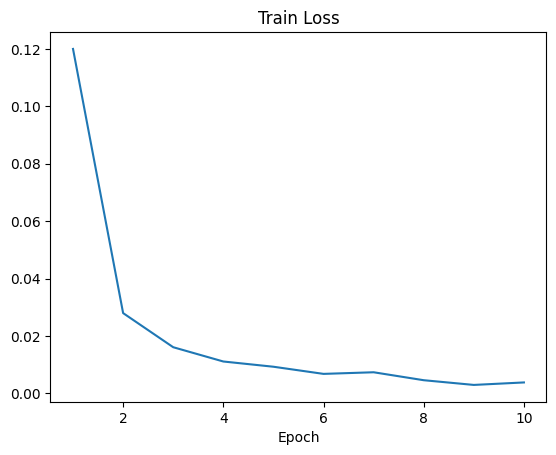

Validate: 100%|██████████| 10/10 [00:00<00:00, 27.22it/s]

Accuracy: 99.84%


In [ ]:
# Then train the network to recognize digits with noise(grid lines)
train_loss = digits.train(train2_loader, model, loss_fn, optimizer, 10)
digits.plot_train_loss(train_loss)
accuracy = digits.validate(val_loader, model)
print(f"Accuracy: {100 * accuracy:.2f}%")

In [8]:
digits.save_model(model, './models', accuracy)

Save trained model: digits_20250410195037_9984.pth
